In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/Preprocessed_Bank_Customer_Churn_Prediction.csv')

# 사용할 피처 선택 (customer_id 제거)
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'country']

X = df[features]
y = df['churn']

df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [21]:
from sklearn.metrics import roc_curve, auc

def auc_plot(model, X_test, y_test):
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [22]:
# 'balance'와 'estimated_salary' 컬럼을 skewed_columns 리스트에 추가
skewed_columns = ['age', 'balance', 'estimated_salary', 'credit_score']  # 'balance'와 'estimated_salary' 추가
# skewed_columns = ['balance', 'estimated_salary', 'credit_score']  # 'balance'와 'estimated_salary' 추가
# skewed_columns = ['age', 'balance', 'estimated_salary']  # 'balance'와 'estimated_salary' 추가

# log1p 변환 함수
def log1p_transform_columns(df, columns):
    for column in columns:
        df[column] = np.log1p(df[column])  # np.log1p는 log(x+1)
    return df

# log1p 변환 수행
df = log1p_transform_columns(df, skewed_columns)

# 최종 데이터 확인
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,6.429719,0,1,3.761200,2,0.000000,1,1,1,11.526334,1
1,6.411818,2,1,3.737670,1,11.336294,1,0,1,11.631096,0
2,6.220590,0,1,3.761200,8,11.980813,3,1,0,11.643362,1
3,6.551080,0,1,3.688879,1,0.000000,2,0,0,11.449215,0
4,6.746412,2,1,3.784190,2,11.740155,1,1,1,11.278280,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 정규화 (Normalization) - 0과 1 사이로 변환
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

리포트 :
               precision    recall  f1-score   support

           0     0.8673    0.8589    0.8631      2389
           1     0.4685    0.4861    0.4771       611

    accuracy                         0.7830      3000
   macro avg     0.6679    0.6725    0.6701      3000
weighted avg     0.7861    0.7830    0.7845      3000



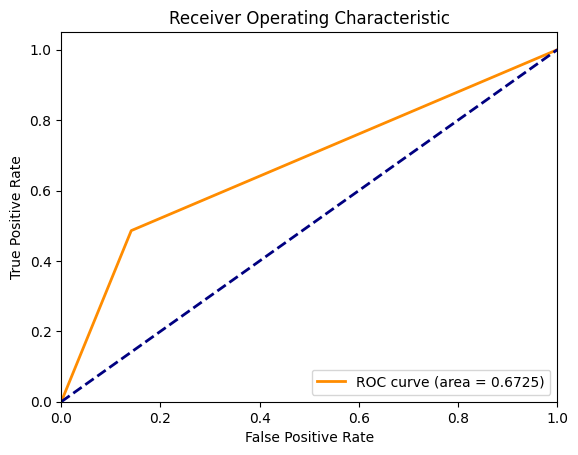

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = clf.predict(X_test)

# 정확도 출력
print('리포트 :\n', classification_report(y_test, y_pred, digits=4))

auc_plot(clf, X_test, y_test)

              precision    recall  f1-score   support

           0     0.8620    0.9782    0.9165      2389
           1     0.8201    0.3879    0.5267       611

    accuracy                         0.8580      3000
   macro avg     0.8411    0.6831    0.7216      3000
weighted avg     0.8535    0.8580    0.8371      3000



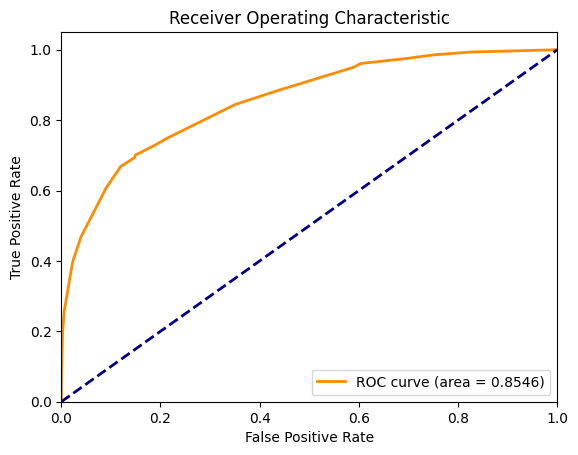

In [25]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': range(1, 11),
#     # 'criterion': ['gini', 'entropy'],
#     # 'splitter': ['best', 'random'],
#     'min_samples_split': range(2, 11),
#     'min_samples_leaf': range(1, 11),
# }

# grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# 
# .fit(X_train, y_train)

# print('최적의 하이퍼파라미터 :', grid_search.best_params_)

# 최적의 하이퍼파라미터 : {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}

from sklearn.metrics import classification_report
# 최적의 하이퍼파라미터로 학습
clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=7, min_samples_split=2)

clf.fit(X_train, y_train)
# 테스트 데이터로 예측
y_pred = clf.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

auc_plot(clf, X_test, y_test)

리포트 :
               precision    recall  f1-score   support

           0     0.8756    0.9602    0.9160      2389
           1     0.7500    0.4664    0.5752       611

    accuracy                         0.8597      3000
   macro avg     0.8128    0.7133    0.7456      3000
weighted avg     0.8500    0.8597    0.8465      3000



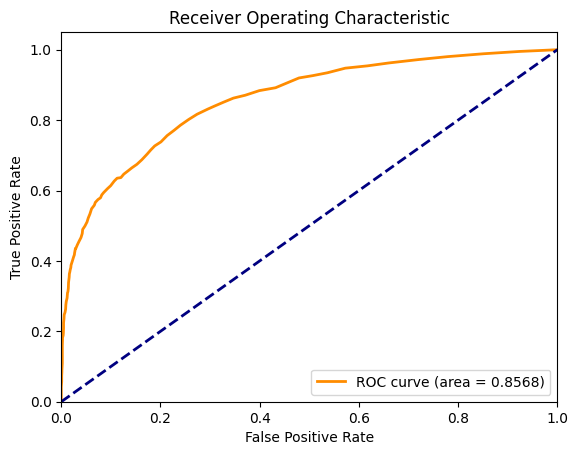

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 랜덤 포레스트 모델 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



# 테스트 데이터로 예측
y_pred = rf.predict(X_test)

# 정확도 출력
print('리포트 :\n', classification_report(y_test, y_pred, digits=4))

auc_plot(rf, X_test, y_test)

In [27]:
# from sklearn.model_selection import GridSearchCV

# # 그리드 탐색을 위한 파라미터 설정
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
# }

# # 랜덤 포레스트 모델 생성
# rf = RandomForestClassifier(random_state=42)

# # 그리드 탐색 수행
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# # 최적의 파라미터 출력
# print('최적의 파라미터 :', grid_search.best_params_)

              precision    recall  f1-score   support

           0     0.8766    0.9665    0.9194      2389
           1     0.7814    0.4681    0.5855       611

    accuracy                         0.8650      3000
   macro avg     0.8290    0.7173    0.7524      3000
weighted avg     0.8572    0.8650    0.8514      3000



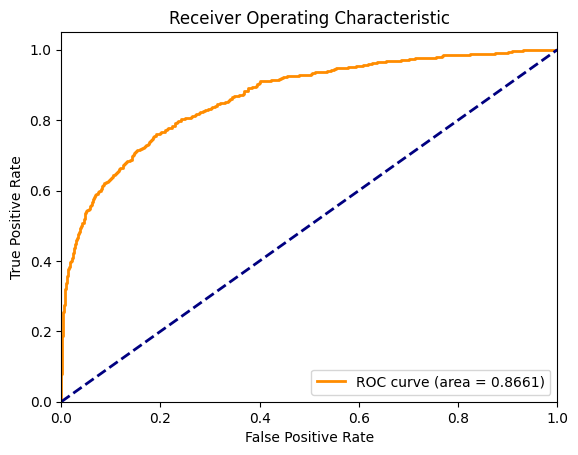

In [28]:
# 최적의 파라미터 : {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=2, min_samples_split=5, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

auc_plot(rf, X_test, y_test)

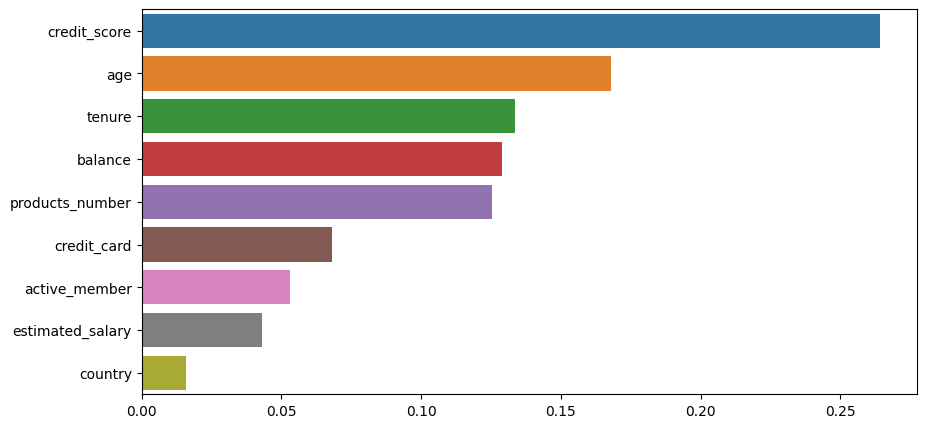

In [29]:
# 피처 중요도 출력
feature_importances = rf.feature_importances_
# 정렬
feature_importances = np.sort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=features, hue=features, dodge=False)
plt.show()

In [30]:
# %pip install catboost

In [31]:
# catboost 모델 적용
from catboost import CatBoostClassifier

# CatBoost 모델 생성

cat = CatBoostClassifier(random_state=42)

# 학습
cat.fit(X_train, y_train)

Learning rate set to 0.023648
0:	learn: 0.6739655	total: 6.3ms	remaining: 6.3s
1:	learn: 0.6563983	total: 9.32ms	remaining: 4.65s
2:	learn: 0.6389791	total: 12.3ms	remaining: 4.07s
3:	learn: 0.6244932	total: 15.6ms	remaining: 3.9s
4:	learn: 0.6094522	total: 18.6ms	remaining: 3.7s
5:	learn: 0.5946118	total: 21.3ms	remaining: 3.52s
6:	learn: 0.5813764	total: 24.1ms	remaining: 3.42s
7:	learn: 0.5682653	total: 26.8ms	remaining: 3.32s
8:	learn: 0.5575754	total: 28.9ms	remaining: 3.19s
9:	learn: 0.5484376	total: 32ms	remaining: 3.16s
10:	learn: 0.5379607	total: 34.4ms	remaining: 3.09s
11:	learn: 0.5274843	total: 36.9ms	remaining: 3.04s
12:	learn: 0.5190911	total: 41.4ms	remaining: 3.14s
13:	learn: 0.5103540	total: 44.5ms	remaining: 3.13s
14:	learn: 0.5019329	total: 47.8ms	remaining: 3.14s
15:	learn: 0.4944229	total: 51.4ms	remaining: 3.16s
16:	learn: 0.4878080	total: 54.2ms	remaining: 3.13s
17:	learn: 0.4819263	total: 57.2ms	remaining: 3.12s
18:	learn: 0.4761029	total: 60.1ms	remaining: 3.1s

              precision    recall  f1-score   support

           0     0.8788    0.9590    0.9171      2389
           1     0.7506    0.4828    0.5876       611

    accuracy                         0.8620      3000
   macro avg     0.8147    0.7209    0.7524      3000
weighted avg     0.8527    0.8620    0.8500      3000



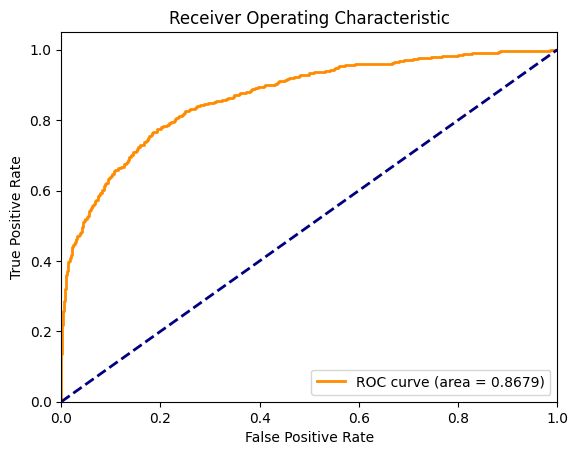

In [32]:
# 예측
y_pred = cat.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

auc_plot(cat, X_test, y_test)

In [33]:
# param_grid = {
#     'depth': [2,3,4],
#     'learning_rate': [0.05, 0.1, 0.5],
#     'iterations': [50, 100, 150],
# }

# grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# print('최적의 파라미터 :', grid_search.best_params_)

In [34]:
# 최적의 파라미터 : {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

cat = CatBoostClassifier(random_state=42, depth=4, iterations=100, learning_rate=0.1)

cat.fit(X_train, y_train)

0:	learn: 0.6437383	total: 1.15ms	remaining: 114ms
1:	learn: 0.6036744	total: 2.24ms	remaining: 110ms
2:	learn: 0.5713466	total: 3.18ms	remaining: 103ms
3:	learn: 0.5439388	total: 3.98ms	remaining: 95.5ms
4:	learn: 0.5197960	total: 6.18ms	remaining: 117ms
5:	learn: 0.4998073	total: 6.92ms	remaining: 108ms
6:	learn: 0.4841616	total: 8.54ms	remaining: 113ms
7:	learn: 0.4692392	total: 10.1ms	remaining: 117ms
8:	learn: 0.4579318	total: 11.2ms	remaining: 114ms
9:	learn: 0.4458327	total: 12.5ms	remaining: 112ms
10:	learn: 0.4357098	total: 13.2ms	remaining: 107ms
11:	learn: 0.4265494	total: 13.9ms	remaining: 102ms
12:	learn: 0.4182925	total: 14.7ms	remaining: 98.3ms
13:	learn: 0.4115650	total: 15.4ms	remaining: 94.8ms
14:	learn: 0.4060930	total: 16.3ms	remaining: 92.3ms
15:	learn: 0.4014923	total: 17.2ms	remaining: 90.1ms
16:	learn: 0.3970652	total: 18ms	remaining: 87.8ms
17:	learn: 0.3935590	total: 18.9ms	remaining: 86.1ms
18:	learn: 0.3900342	total: 19.7ms	remaining: 84.1ms
19:	learn: 0.386

              precision    recall  f1-score   support

           0     0.8775    0.9686    0.9208      2389
           1     0.7934    0.4714    0.5914       611

    accuracy                         0.8673      3000
   macro avg     0.8355    0.7200    0.7561      3000
weighted avg     0.8604    0.8673    0.8537      3000



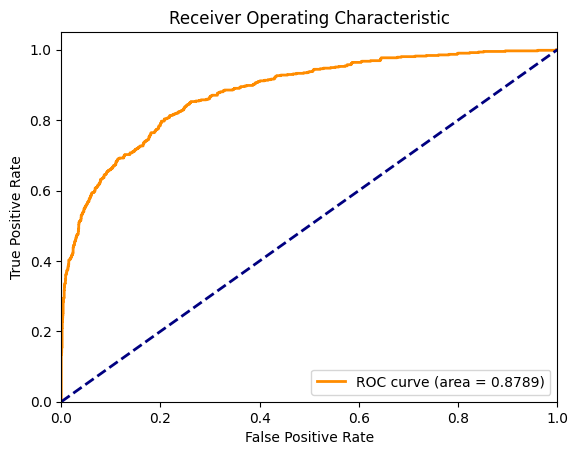

In [35]:
y_pred = cat.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

auc_plot(cat, X_test, y_test)